# Churn Data preprocessing 

In [1]:
#Importing lbraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

df=pd.read_csv('churn_clean.csv') #Read CSV File
churn_k_means=df
churn_k_means

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M324793,45deb5a2-ae04-4518-bf0b-c82db8dbe4a4,9499fb4de537af195d16d046b79fd20a,Mount Holly,VT,Rutland,5758,43.43391,-72.78734,...,159.979400,6511.252601,3,2,3,3,4,3,2,3
9996,9997,D861732,6e96b921-0c09-4993-bbda-a1ac6411061a,c09a841117fa81b5c8e19afec2760104,Clarksville,TN,Montgomery,37042,36.56907,-87.41694,...,207.481100,5695.951810,4,5,5,4,4,5,2,5
9997,9998,I243405,e8307ddf-9a01-4fff-bc59-4742e03fd24f,9c41f212d1e04dca84445019bbc9b41c,Mobeetie,TX,Wheeler,79061,35.52039,-100.44180,...,169.974100,4159.305799,4,4,4,4,4,4,4,5
9998,9999,I641617,3775ccfc-0052-4107-81ae-9657f81ecdf3,3e1f269b40c235a1038863ecf6b7a0df,Carrollton,GA,Carroll,30117,33.58016,-85.13241,...,252.624000,6468.456752,4,4,6,4,3,3,5,4


In [2]:
#create function to check for missing values in the data

def count_of_null(churn_k_means):
    count=churn_k_means.isnull().sum().sum()
    return count

# print missing value count in the data
count_null = count_of_null(churn_k_means)
print(count_null)

0


In [3]:
#create function to check duplicate values in the data
def check_duplicates(churn_k_means):
    count=churn_k_means.duplicated().sum().sum()
    return count

# print duplicate values in the data
count_duplicates = check_duplicates(churn_k_means)
print(count_duplicates)

0


In [4]:
#create a function to check information about the data
def about_data (churn_k_means):
        about=churn_k_means.info()
        return about
    
#print information about the data
info=about_data (churn_k_means)
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
#Remove irrelevant columns

churn_k_means=churn_k_means.drop(columns=['Item1','Item2','Item3','Item4','Item5','Item6','Item7','Item8','Interaction',
                          'UID', 'City', 'County','TimeZone','CaseOrder','Zip'])
churn_k_means

,Customer_id,State,Lat,Lng,Population,Area,Job,Children,Age,Income,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,K409198,AK,56.25100,-133.37571,38,Urban,Environmental health practitioner,0,68,28561.99,...,Yes,No,No,No,Yes,Yes,Credit Card (automatic),6.795513,172.455519,904.536110
1,S120509,MI,44.32893,-84.24080,10446,Urban,"Programmer, multimedia",1,27,21704.77,...,No,No,No,Yes,Yes,Yes,Bank Transfer(automatic),1.156681,242.632554,800.982766
2,K191035,OR,45.35589,-123.24657,3735,Urban,Chief Financial Officer,4,50,9609.57,...,No,No,No,No,Yes,Yes,Credit Card (automatic),15.754144,159.947583,2054.706961
3,D90850,CA,32.96687,-117.24798,13863,Suburban,Solicitor,1,48,18925.23,...,No,No,No,Yes,No,Yes,Mailed Check,17.087227,119.956840,2164.579412
4,K662701,TX,29.38012,-95.80673,11352,Suburban,Medical illustrator,0,83,40074.19,...,No,No,Yes,Yes,No,No,Mailed Check,1.670972,149.948316,271.493436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,M324793,VT,43.43391,-72.78734,640,Rural,Sport and exercise psychologist,3,23,55723.74,...,Yes,Yes,No,No,No,No,Electronic Check,68.197130,159.979400,6511.252601
9996,D861732,TN,36.56907,-87.41694,77168,Rural,Consulting civil engineer,4,48,34129.34,...,Yes,Yes,No,Yes,No,No,Electronic Check,61.040370,207.481100,5695.951810
9997,I243405,TX,35.52039,-100.44180,406,Rural,IT technical support officer,1,48,45983.43,...,Yes,No,No,No,No,Yes,Bank Transfer(automatic),47.416890,169.974100,4159.305799
9998,I641617,GA,33.58016,-85.13241,35575,Urban,Water engineer,1,39,16667.58,...,No,No,Yes,Yes,Yes,Yes,Credit Card (automatic),71.095600,252.624000,6468.456752


In [6]:
# create function to print unique values in the dataframe

def print_unique_values(churn_k_means):
    for column in churn_k_means.columns:
        unique_values = churn_k_means[column].unique()
        print(f"Column '{column}' has {len(unique_values)} unique values:")
        print(unique_values)
print_unique_values(churn_k_means)

Column 'Customer_id' has 10000 unique values:
['K409198' 'S120509' 'K191035' ... 'I243405' 'I641617' 'T38070']
Column 'State' has 52 unique values:
['AK' 'MI' 'OR' 'CA' 'TX' 'GA' 'TN' 'OK' 'FL' 'OH' 'PA' 'PR' 'IA' 'ME'
 'IL' 'WI' 'NC' 'AL' 'NM' 'VT' 'MD' 'NY' 'WA' 'CT' 'NJ' 'DC' 'ND' 'LA'
 'NE' 'WV' 'AZ' 'MO' 'WY' 'MT' 'VA' 'KY' 'MN' 'KS' 'MA' 'IN' 'SC' 'NH'
 'DE' 'MS' 'ID' 'AR' 'SD' 'CO' 'HI' 'UT' 'RI' 'NV']
Column 'Lat' has 8563 unique values:
[56.251   44.32893 45.35589 ... 43.43391 36.56907 34.70783]
Column 'Lng' has 8630 unique values:
[-133.37571  -84.2408  -123.24657 ...  -72.78734  -87.41694  -83.53648]
Column 'Population' has 5933 unique values:
[   38 10446  3735 ...  4261 77168 12230]
Column 'Area' has 3 unique values:
['Urban' 'Suburban' 'Rural']
Column 'Job' has 639 unique values:
['Environmental health practitioner' 'Programmer, multimedia'
 'Chief Financial Officer' 'Solicitor' 'Medical illustrator'
 'Chief Technology Officer' 'Surveyor, hydrographic'
 'Sales promotion a

In [7]:
#Create function to check statistical summary of the dataset
def stat_summary (churn_k_means):
    statistics_sum = churn_k_means.describe()
    return statistics_sum
#print statistical summary of data
summary = stat_summary (churn_k_means)
summary

,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550
std,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852
min,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715
25%,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827
50%,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903
75%,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370
max,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530


In [8]:
#create function to find columns with Categorical Values

def categorcal_columns (churn_k_means):
    cat_cols= churn_k_means.select_dtypes(exclude=['int','float']).columns.tolist()
    return cat_cols
#print categorical columns
categorical = categorcal_columns (churn_k_means)
categorical

['Customer_id',
 'State',
 'Area',
 'Job',
 'Marital',
 'Gender',
 'Churn',
 'Techie',
 'Contract',
 'Port_modem',
 'Tablet',
 'InternetService',
 'Phone',
 'Multiple',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'PaymentMethod']

In [9]:
#create function to find columns with Numerical Values

def numerical_columns (churn_k_means):
    num_cols = churn_k_means.select_dtypes(include=['int','float']).columns.tolist()
    return num_cols
#print numerical columns
numerical = numerical_columns (churn_k_means)
numerical

['Lat',
 'Lng',
 'Population',
 'Children',
 'Age',
 'Income',
 'Outage_sec_perweek',
 'Email',
 'Contacts',
 'Yearly_equip_failure',
 'Tenure',
 'MonthlyCharge',
 'Bandwidth_GB_Year']

In [10]:
#Removing extra spaces from the features Using strip()
churn_k_means.columns = churn_k_means.columns.str.strip()

In [11]:
#Finding Outliers using IQR score

#The IQR is the first quartile subtracted from the third quartile; 
#these quartiles can be clearly seen on a box plot on the data.
# calculate IQR score
#where Q3 is the 75th percentile of the data and Q1 is the 25th percentile of the data.
Q1 = churn_k_means.quantile(0.25)
Q3 = churn_k_means.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
# IQR of each column

Lat                         6.765080
Lng                        16.994067
Population              12430.000000
Children                    3.000000
Age                        36.000000
Income                  34021.452500
Outage_sec_perweek          3.951271
Email                       4.000000
Contacts                    2.000000
Yearly_equip_failure        1.000000
Tenure                     53.562101
MonthlyCharge              60.755486
Bandwidth_GB_Year        4349.670543
dtype: float64


In [12]:
#remove outlier
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
#Once the IQR is calculated, we can use it to identify outliers by defining a threshold range as follows;
#Lower threshold = Q1 - 1.5 * IQR
#Upper threshold = Q3 + 1.5 * IQR
#Any data points that fall outside of this range are considered outliers and removed from the dataset

churn_k_means = churn_k_means[~((churn_k_means < (Q1 - 1.5 * IQR)) |(churn_k_means > (Q3 + 1.5 * IQR))).any(axis=1)]
churn_k_means.shape

(7973, 35)

# Geographic Clustering

In [13]:
# Standardize the Lng and Lat columns

scaler = StandardScaler()
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)
churn_k_means[['Lng', 'Lat']] = scaler.fit_transform(churn_k_means[['Lng', 'Lat']])

In [14]:
churn_k_means2 = churn_k_means[['Lng', 'Lat']]
churn_k_means2

,Lng,Lat
1,0.390836,1.170014
3,-2.248079,-1.288673
4,-0.533857,-2.064825
5,0.418850,-1.374484
6,0.387788,-0.538362
...,...,...
9993,1.724987,1.265684
9994,1.182742,0.706060
9995,1.306536,0.976337
9997,-0.904430,-0.736105


In [15]:
#Using k-means on the geographic coordinates with the number of clusters = 25
from sklearn.cluster import KMeans
Kmeans = KMeans(n_clusters=100)
Kmeans.fit(churn_k_means2)

KMeans(n_clusters=100)

In [16]:
labels = Kmeans.predict(churn_k_means2)
centroids = Kmeans.cluster_centers_
labels

array([39, 20, 16, ..., 98, 93,  6])

In [17]:
centroids

array([[ 5.64084939e-01, -2.35757476e+00],
       [-7.92070336e-02, -4.92583155e-02],
       [-2.56045777e+00, -2.29689482e-01],
       [ 6.75766244e-01,  5.05245759e-01],
       [-1.99349677e+00,  2.05497181e+00],
       [-4.09300037e-01, -1.27781323e+00],
       [ 5.56785106e-01, -8.26893978e-01],
       [-5.34069274e-01,  1.56017977e+00],
       [-1.45736910e+00, -9.06016849e-01],
       [ 1.15152837e+00,  8.40813295e-01],
       [-5.81065298e-01,  7.78951287e-01],
       [ 1.10173978e+00,  2.27527792e-01],
       [-1.85358486e+00,  9.69370874e-01],
       [-6.77932834e-01, -6.97444181e-01],
       [ 7.37497695e-04,  8.24082580e-01],
       [ 6.38726517e-01, -1.97032195e-02],
       [-4.81548685e-01, -1.95137138e+00],
       [ 3.77759046e-01, -5.24091347e-01],
       [-1.70988677e+00, -3.62538548e-02],
       [-1.27713383e-01, -1.50878084e+00],
       [-2.18124292e+00, -1.30881116e+00],
       [ 5.62109031e-01, -1.42335115e+00],
       [ 1.05823920e-01, -1.12649268e+00],
       [-7.

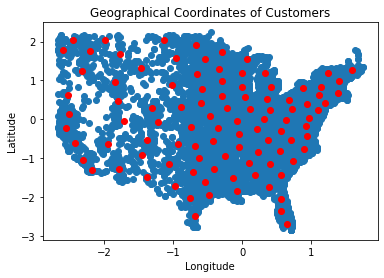

In [18]:
# Extract longitude and latitude columns from churn_k_means2
lng = churn_k_means2['Lng']
lat = churn_k_means2['Lat']

# Plot the coordinates

plt.scatter(lng, lat)
plt.title('Geographical Coordinates of Customers')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.scatter(centroids[:,0], centroids[:, 1], color='red')
plt.show()

#low churn or stay customer cluster in western united states
#Midwest have high churn or stay count
#South have high churn or stay count
#Northest have high churn or stay count


#The aim of geographical clustering in churn data analysis is to identify spatial patterns 
#or clusters of customers who are more likely to churn or stay. 
#This is done by using geographical data such as longitude and latitude coordinates 
#to group customers into clusters based on their proximity to each other. 
#By identifying clusters of customers who are more likely to churn or stay,
#businesses can then develop targeted strategies to reduce customer churn and retain more customers.
#For example, they could offer incentives or promotions to customers in high-churn clusters to encourage them to stay, 
#or provide additional support to customers in these clusters to improve their overall customer experience.

# Visualization of customer Churn and Geographical cordinates

In [19]:
#print dataframe
churn_k_means3 = churn_k_means[['Churn','Lng','Lat']]
churn_k_means3

,Churn,Lng,Lat
1,Yes,0.390836,1.170014
3,No,-2.248079,-1.288673
4,Yes,-0.533857,-2.064825
5,No,0.418850,-1.374484
6,Yes,0.387788,-0.538362
...,...,...,...
9993,No,1.724987,1.265684
9994,No,1.182742,0.706060
9995,No,1.306536,0.976337
9997,No,-0.904430,-0.736105


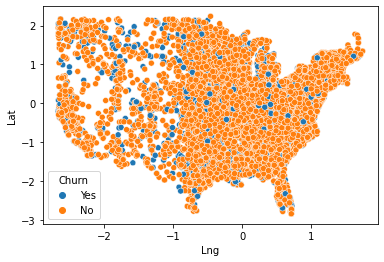

In [20]:
# Visualize Dataframe
sns.scatterplot(data = churn_k_means3, x = 'Lng', y = 'Lat', hue = 'Churn')
plt.show()

#We see that most of the churners are on the western united states

# K-means Clustering Analysis of Tenure and Geographical cordinate 

In [21]:
#Standardize the Tenure column

scaler = StandardScaler()
churn_k_means[['Tenure']] = scaler.fit_transform(churn_k_means[['Tenure']])

In [22]:
#print dataframe
churn_k_means4 = churn_k_means[['Lng','Lat','Tenure']]
churn_k_means4

,Lng,Lat,Tenure
1,0.390836,1.170014,-1.264546
3,-2.248079,-1.288673,-0.663591
4,-0.533857,-2.064825,-1.245145
5,0.418850,-1.374484,-1.044078
6,0.387788,-0.538362,-0.808844
...,...,...,...
9993,1.724987,1.265684,0.950168
9994,1.182742,0.706060,0.575031
9995,1.306536,0.976337,1.264448
9997,-0.904430,-0.736105,0.480546


In [23]:
# training and test splits

X_train, X_test, y_train, y_test = train_test_split(churn_k_means4[['Lat','Lng']], 
                                                    churn_k_means4[['Tenure']], 
                                                    test_size=0.3, random_state=0) #train_test_split in 70:30

In [24]:
#normalize the training and test data
#X_train = preprocessing.normalize(X_train)
#X_test= preprocessing.normalize(X_test)

In [25]:
#Fitting and Evaluating the Model
#For the first iteration,arbitrarily choose a number of clusters (referred to as k) of 3.

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X_train)


KMeans(n_clusters=3, random_state=0)

<AxesSubplot:xlabel='Lng', ylabel='Lat'>

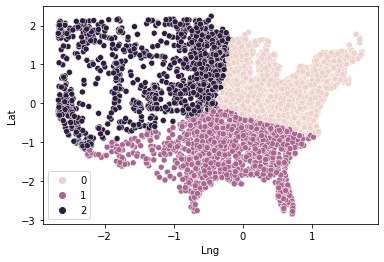

In [26]:
#access labels from the labels_ attribute. 
#visualize the data 

sns.scatterplot(data = X_train, x = 'Lng', y = 'Lat', hue = kmeans.labels_)

#We see that the data are now clearly split into 3 distinct groups
#West '2'
#Midwest & Northeast '0'
#South '1'

<AxesSubplot:ylabel='Tenure'>

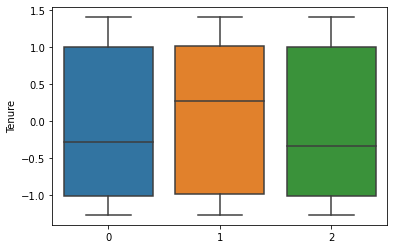

In [27]:
#check the distribution of Tenure in these 3 groups using a boxplot.

sns.boxplot(x = kmeans.labels_, y = y_train['Tenure'])


#We clearly see that the 0 (West) and 2 (Midwest & Northeast) clusters have similar Tenure distributions   
#cluster 1 (South) has higher Tenure distribution 


In [28]:
#evaluate performance of the clustering algorithm using a Silhouette score 
Performance = silhouette_score(X_train, kmeans.labels_, metric='euclidean')
print(Performance)

#a lower score represents a better fit.

0.4156324702918241


In [29]:
#Choosing the best number of clusters
#create the below loop to test and store different model results 
#so that we can make a decision on the best number of clusters.


K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0).fit(X_train)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(X_train, model.labels_, metric='euclidean'))

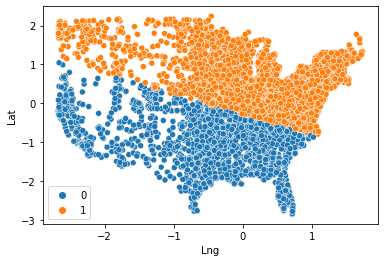

In [30]:
#First we look at
k = 2.

sns.scatterplot(data = X_train, x = 'Lng', y = 'Lat', hue = fits[0].labels_)
plt.show()

#The model does an ok job of splitting the country into two halves, but probably doesn’t capture enough nuance in West

<AxesSubplot:xlabel='Lng', ylabel='Lat'>

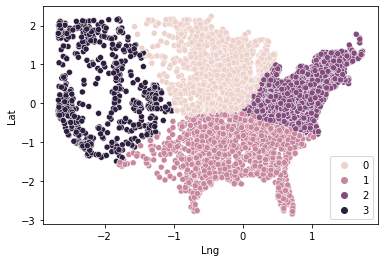

In [31]:
k = 4.
sns.scatterplot(data = X_train, x = 'Lng', y = 'Lat', hue = fits[2].labels_)

#The model does a good job at improving the cluster grouping logically as we increase k.

<AxesSubplot:>

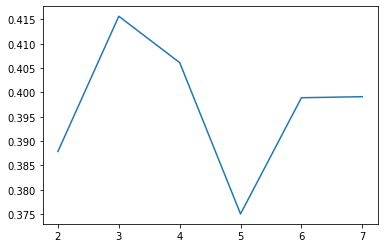

In [32]:
#using an elbow plot where the y-axis is a measure of goodness of fit 
#and the x-axis is the value of k. 

sns.lineplot(x = K, y = score)

#We typically choose the point where the improvements in performance start to flatten or get worse. 
#We see k = 5 is probably the best we can do without overfitting

#Typically, as we increase the value of K, we see improvements in clusters and what they represent until a certain point. 
#We then start to see diminishing returns or even worse performance. We can visually see this to help make a decision 

<AxesSubplot:xlabel='Lng', ylabel='Lat'>

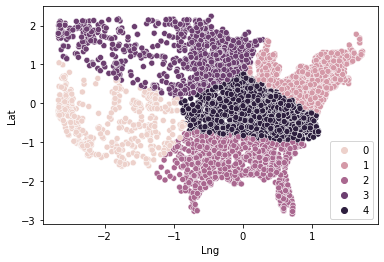

In [33]:
#k=5
sns.scatterplot(data = X_train, x = 'Lng', y = 'Lat', hue = fits[3].labels_)

#We can also see that the clusters do a relatively good job of breaking United States into distinct clusters and these clusters map relatively well to different Tenure ranges as seen below

<AxesSubplot:ylabel='Tenure'>

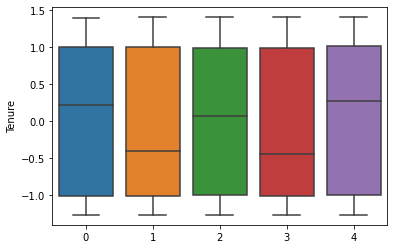

In [34]:
#Tenure Distribution
sns.boxplot(x = fits[3].labels_, y = y_train['Tenure'])

In [35]:
# load cleaned churn_k_means dataframe into CSV file.
churn_k_means.to_csv('Fixed_churn_k_means.csv', index=False, header=True)